# **Exploratory Data Analysis (EDA) for Real Estate Pricing**

**Project:** Real Estate Pricing Analysis

**Objective**:Identify key factors influencing house pricing using Exploratory Data Analysis(EDA)

# Import Required Liabraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline

# Load the Dataset:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/housing_data.csv')
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


# Data Cleaning

In [4]:
df.info()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
df.fillna(method='ffill', inplace=True)

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

/tmp/ipython-input-20622056.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,421.610009,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,364.750000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,729.500000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1094.250000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,1459.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


# Univariate Analysis

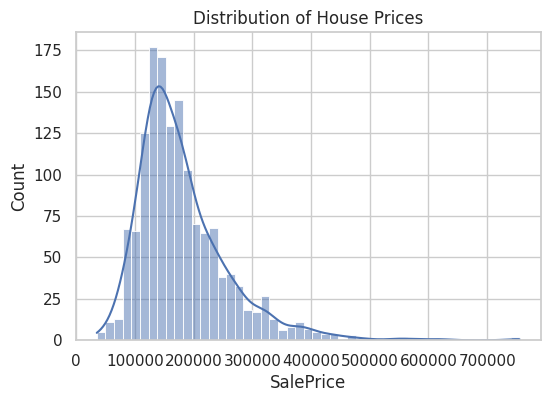

In [5]:
plt.figure(figsize=(6,4))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.show()



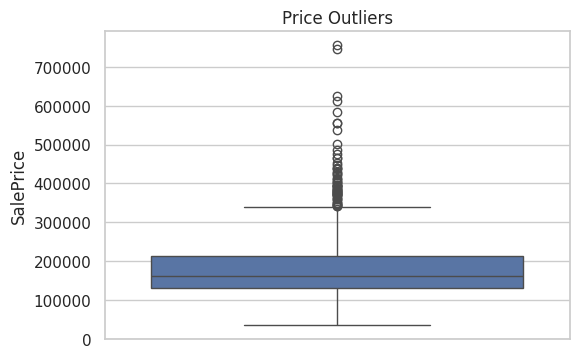

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['SalePrice'])
plt.title('Price Outliers')
plt.show()

# Multivariate Analysis

<Figure size 1000x600 with 0 Axes>

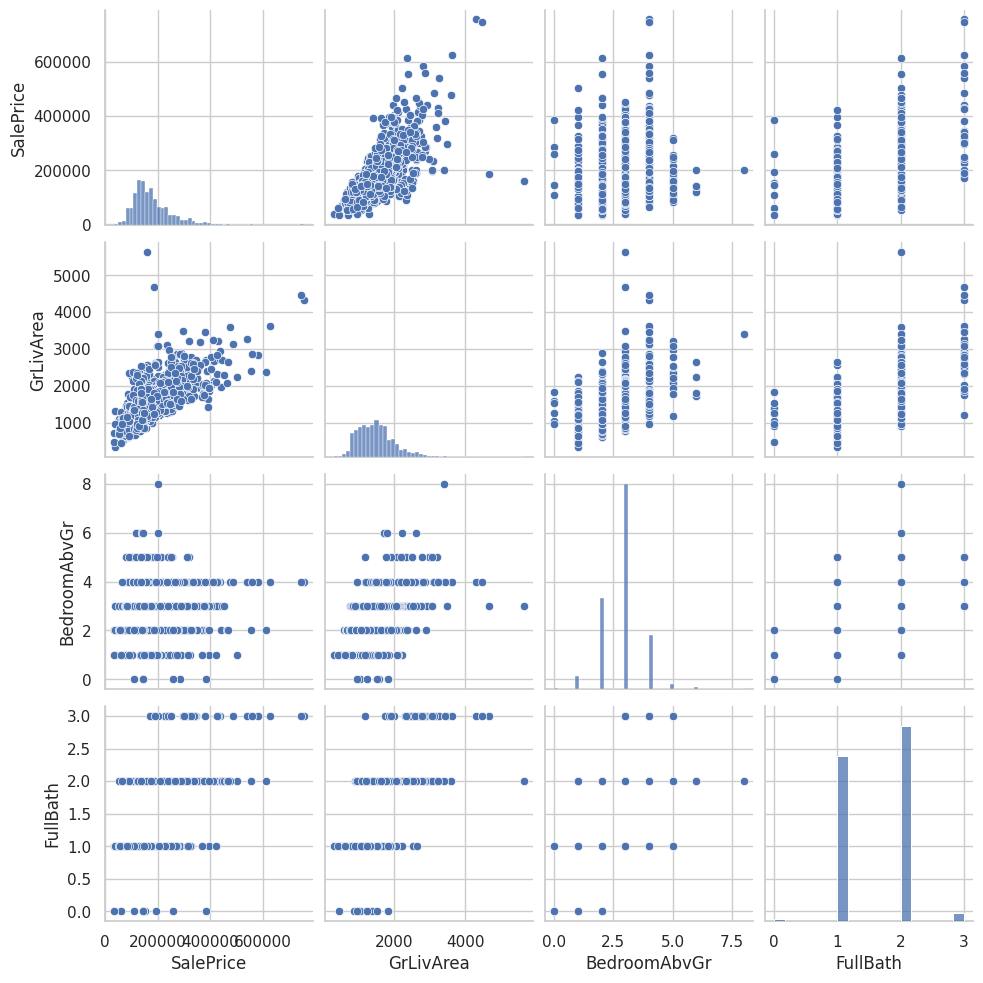

In [7]:
plt.figure(figsize=(10,6))
sns.pairplot(df[['SalePrice','GrLivArea','BedroomAbvGr','FullBath']])
plt.show()

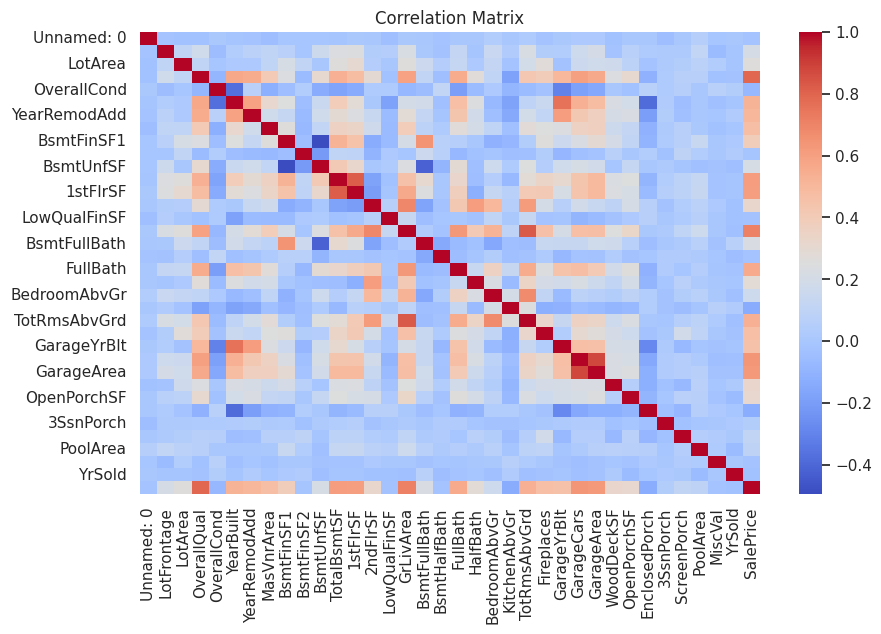

In [8]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()



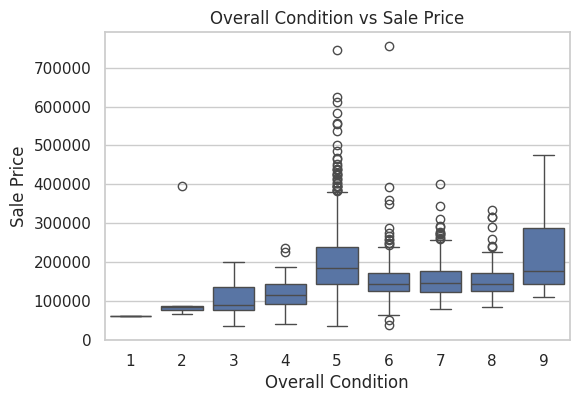

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x='OverallCond', y='SalePrice', data=df)
plt.title('Overall Condition vs Sale Price')
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.show()


# Feature Engineering

In [9]:
# Price per square foot
df['price_per_sqft'] = df['SalePrice'] / df['GrLivArea']

# Property age
if 'YearBuilt' in df.columns:
    df['property_age'] = 2026 - df['YearBuilt']

df[['SalePrice','GrLivArea','price_per_sqft']].head()

,SalePrice,GrLivArea,price_per_sqft
0,208500,1710,121.929825
1,181500,1262,143.819334
2,223500,1786,125.139978
3,140000,1717,81.537566
4,250000,2198,113.739763


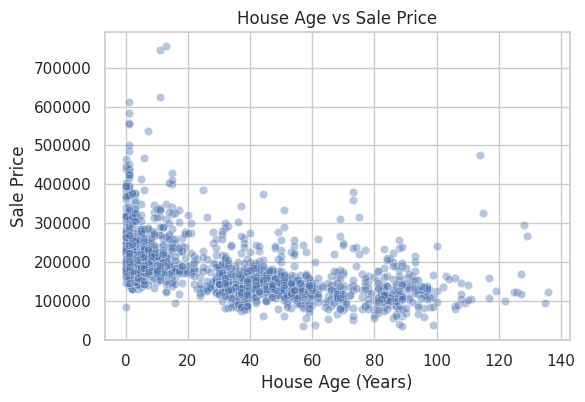

In [17]:
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

plt.figure(figsize=(6,4))
sns.scatterplot(x='HouseAge', y='SalePrice', data=df, alpha=0.4)
plt.title('House Age vs Sale Price')
plt.xlabel('House Age (Years)')
plt.ylabel('Sale Price')
plt.show()


# Feature Engineering & Size Impact

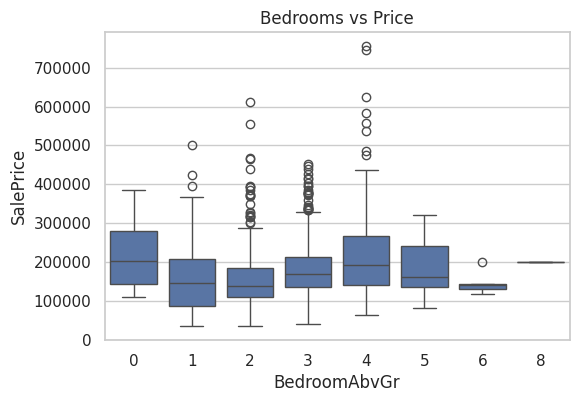

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df)
plt.title('Bedrooms vs Price')
plt.show()



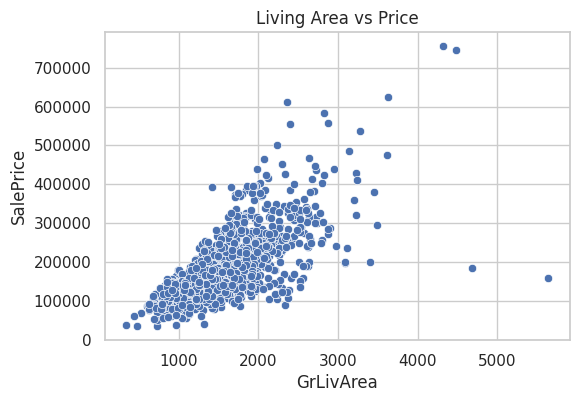

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Living Area vs Price')
plt.show()

# Market Pricing & Historical Pricing

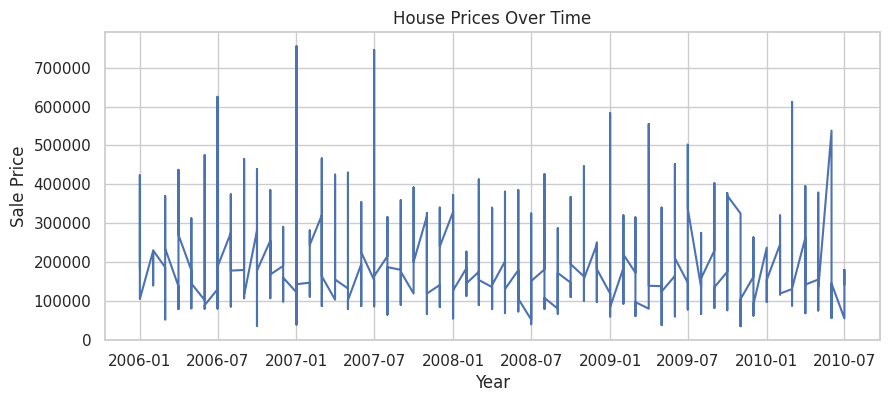

In [12]:
# Create a proper date column from year and month
df['SaleDate'] = pd.to_datetime(
    df['YrSold'].astype(str) + '-' + df['MoSold'].astype(str) + '-01'
)

# Sort by date
df.sort_values('SaleDate', inplace=True)

# Plot trend
plt.figure(figsize=(10,4))
plt.plot(df['SaleDate'], df['SalePrice'])
plt.title('House Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.show()


# Customer Prefrences & Amenities

1 Garage vs SalePrice

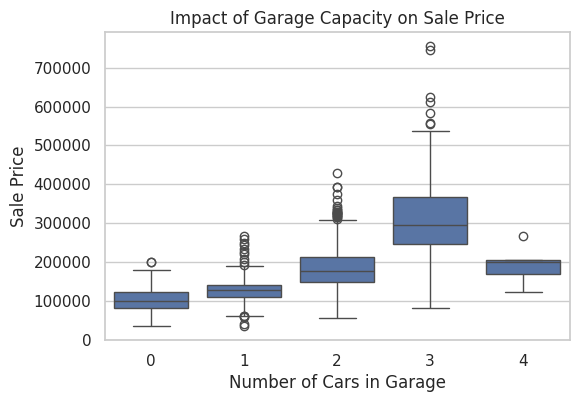

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['GarageCars'], y=df['SalePrice'])
plt.title('Impact of Garage Capacity on Sale Price')
plt.xlabel('Number of Cars in Garage')
plt.ylabel('Sale Price')
plt.show()



2 Fireplaces vs SalePrice

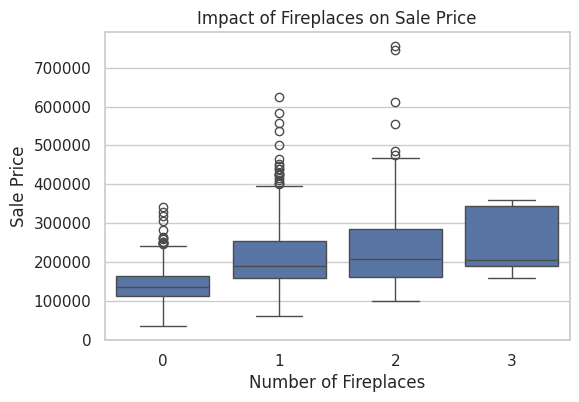

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fireplaces'], y=df['SalePrice'])
plt.title('Impact of Fireplaces on Sale Price')
plt.xlabel('Number of Fireplaces')
plt.ylabel('Sale Price')
plt.show()


3 Pool Area vs Sale Price

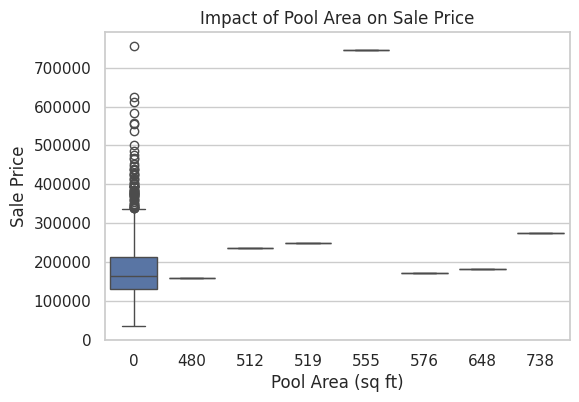

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['PoolArea'], y=df['SalePrice'])
plt.title('Impact of Pool Area on Sale Price')
plt.xlabel('Pool Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()
